```
This file is part of Estimation of Causal Effects in the Alzheimer's Continuum (Causal-AD).

Causal-AD is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

Causal-AD is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with Causal-AD. If not, see <https://www.gnu.org/licenses/>.
```

# Plot Beta-Regression Coefficients

In [1]:
from pathlib import Path
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

from causalad.adni.plot import CoefReader, Plotter

In [2]:
# Parameters
base_dir: str = "outputs/adni/models"

In [ ]:
reader = CoefReader(Path(base_dir))

In [4]:
def coef_load_plot_and_save(data, save_path=None):
    data = data.replace({
        "method": {
            "PPCA": "Proposed (PPCA)",
            "BPMF": "Proposed (BPMF)",
        }
    })

    idx_with_max = data.query("variable == 'mean'").loc[:, "value"].abs().idxmax()
    method_with_max = data.loc[idx_with_max, "method"]

    coefs = (
        data
        .query("(variable == 'mean') & (method == @method_with_max)")
        .set_index("coef")
        .loc[:, "value"]
        .sort_values()
    )

    n_coefs = coefs.shape[0]
    width = n_coefs * 0.65

    cm = get_cmap("Set1")
    palette = [
        cm.colors[0],  # red
        cm.colors[3],  # purple
        cm.colors[4],  # orange
        cm.colors[1],  # blue
        cm.colors[2],  # green
    ]

    method_order = [
        "Non-Causal",
        "Regress-Out",
        "ComBat",
        "Proposed (PPCA)",
        "Proposed (BPMF)",
    ]

    coef_order = coefs.index.tolist()
    p = Plotter(
        coef_order=coef_order,
        method_order=method_order,
        palette=palette,
        figsize=(width, 5.5),
    )
    ax = p.plot(data)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", pad_inches=0.0, transparent=True)
        print(save_path)

    return coef_order

## All Coefficients

In [5]:
coefs = reader.read_coef_with_dim(dim=6)

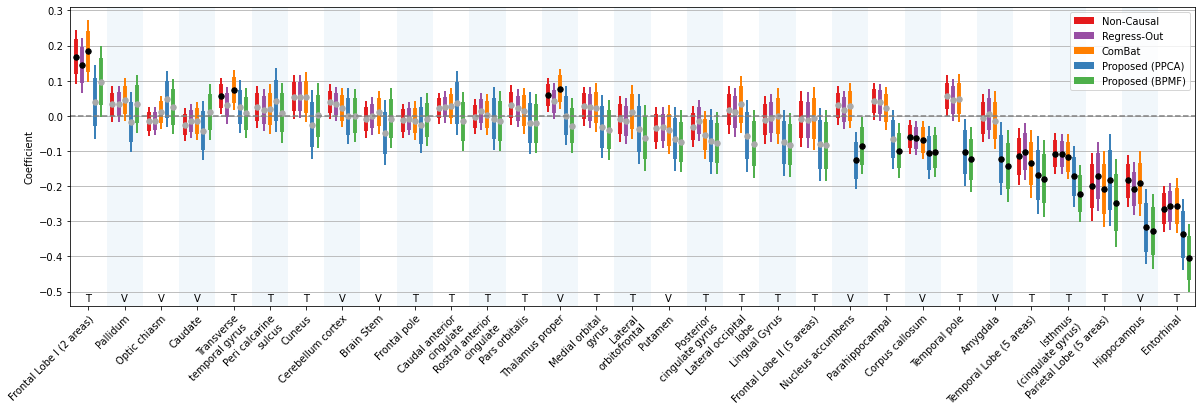

In [6]:
coef_order = coef_load_plot_and_save(coefs)